**About Data :**

In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey.

The data file (responses.csv) consists of 1010 rows and 150 columns (139 integers and 11 categorical).

dataset - responses.csv 

For convenience, the original variable names were shortened in the data file.

The data contain missing values.

The survey was presented to participants in both electronic and written form.

The original questionnaire was in Slovak language and was later translated into English.

All participants were of Slovakian nationality, aged between 15-30.

For this Project we are considering 2 sections of data - Health Habits and Spending Habits

Health Habits - I live a very healthy lifestyle. 
Here Strongly disagree 1-2-3-4-5 Strongly agree

Spending Habits - I save all the money I can.: 
Strongly disagree 1-2-3-4-5 Strongly agree

---------------------------------------------------------------------------------------------------------------

The Agenda is to find whether Spending Habits and Healthy Lifestyle is related to Gender and Place or not.

Steps :

Load the data and extract the relevant columns.

Hint : Relevant Columns will be Finances, Gender, Village-Town and Healthy Eating.

Explore the data and understand how the data is distributed? Is there any outlier or missing value? And Share your insights.

**Create Hypothesis on the following questions:**

1)	Is saving money (finances) gender dependant?

2)	Is there any differences in money saving (finances) between people from city or village?

3)	Do Women have a Healthier Lifestyle than Men?

4)	Are Village People Healthier than City People?

Perform the required statistical tests to validate/reject the Hypothesis in above step. State your insights and conclusions.

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [104]:
data = pd.read_csv('responses.csv',dtype = { "Finances" : "category",
                                                "Gender" : "category", 
                                                "Village - town" : "category",
                                                "Healthy eating" : "category"
                                              },
                                        usecols = {"Finances", "Gender", "Village - town", "Healthy eating"})
                                

In [105]:
data.rename(inplace=True, columns = {"Healthy eating": "Lifestyle", 
                     "Village - town":"Location"})

In [106]:
data.describe()

,Lifestyle,Finances,Gender,Location
count,1007,1007,1004,1006
unique,5,5,2,2
top,3,3,female,city
freq,504,358,593,707


In [107]:
#missing value handling
#replaced with most frequent value in the column.

data = data.fillna(pd.Series(data = ["3", "female", "city", "3"], index = ["Finances", "Gender", "Location", "Lifestyle"]))
data.Lifestyle = data.Lifestyle.astype('int32')
data.Finances = data.Finances.astype('int32')

In [108]:
data.head()

,Lifestyle,Finances,Gender,Location
0,4,3,female,village
1,3,3,female,city
2,3,2,female,city
3,3,2,female,city
4,4,4,female,village


In [139]:
data.describe(include='all')

,Lifestyle,Finances,Gender,Location
count,1010.000000,1010.000000,1010,1010
unique,NaN,NaN,2,2
top,NaN,NaN,female,city
freq,NaN,NaN,599,711
mean,3.031683,3.023762,NaN,NaN
std,0.935473,1.142663,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,3.000000,2.000000,NaN,NaN
50%,3.000000,3.000000,NaN,NaN
75%,4.000000,4.000000,NaN,NaN


In [7]:
responses.describe(include='all')

,Lifestyle,Finances,Gender,Location
count,1010,1010,1010,1010
unique,5,5,2,2
top,3,3,female,city
freq,507,361,599,711


In [297]:
female = data[(data.Location == 'village') & (data.Gender == 'female') ]
female.describe()


,Lifestyle,Finances
count,177.000000,177.000000
mean,3.033898,3.209040
std,0.852125,1.232296
min,1.000000,1.000000
25%,3.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


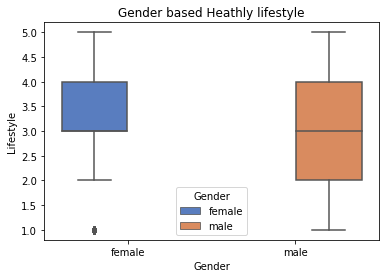

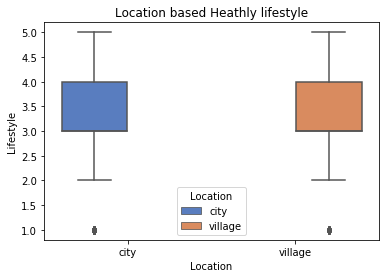

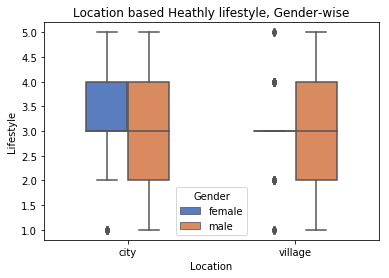

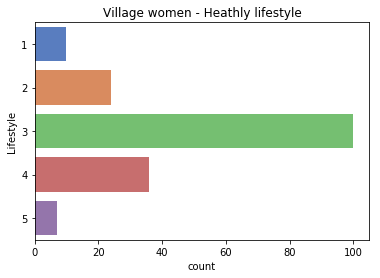

In [298]:
sns.boxplot(x="Gender", y="Lifestyle",
            hue="Gender", palette="muted",
            data=data, )
plt.title("Gender based Heathly lifestyle")
plt.show()

sns.boxplot(x="Location", y="Lifestyle",
            hue="Location", palette="muted",
            data=data)
plt.title("Location based Heathly lifestyle")
plt.show()

sns.boxplot(x="Location", y="Lifestyle",
            hue="Gender", palette="muted",
            data=data, width = 0.5)
plt.title("Location based Heathly lifestyle, Gender-wise")
plt.show()

sns.countplot(y="Lifestyle", palette="muted",
            data=village_female)
plt.title("Village women - Heathly lifestyle")
plt.show()



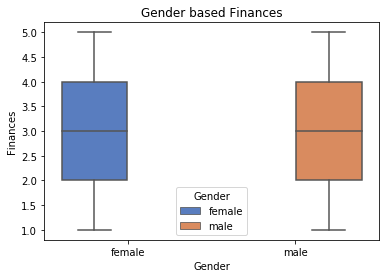

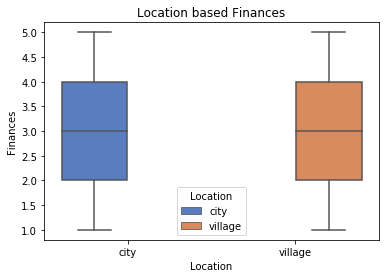

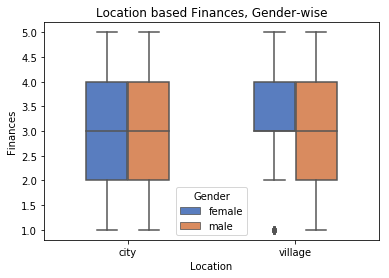

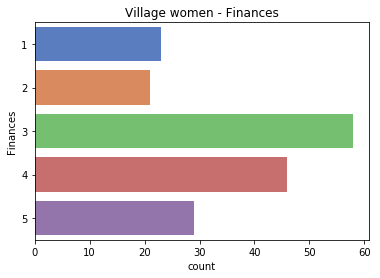

In [224]:
sns.boxplot(x="Gender", y="Finances",
            hue="Gender", palette="muted",
            data=data, )
plt.title("Gender based Finances")
plt.show()

sns.boxplot(x="Location", y="Finances",
            hue="Location", palette="muted",
            data=data)
plt.title("Location based Finances")
plt.show()

sns.boxplot(x="Location", y="Finances",
            hue="Gender", palette="muted",
            data=data, width = 0.5)
plt.title("Location based Finances, Gender-wise")
plt.show()

sns.countplot(y="Finances", palette="muted",
            data=village_female)
plt.title("Village women - Finances")
plt.show()

### 1)	Is saving money (finances) gender dependant?

In [335]:
#H0 = "Saving money is not gender dependant"
#H1 = "Saving money is gender dependant"

gen_fin = pd.crosstab(data["Finances"], data["Gender"])
alpha = 0.05

chi2_stats, p_value, df, expected = stats.chi2_contingency(gen_fin,correction=False)
print("\nDegree of freedom : " , df)
print("p-value : ", p_value)
crit_value = stats.chi2.isf(q = alpha, df = df)
print("chisquare statistics : ", chi2_stats)
print("Critical Value = ", crit_value)
print("\n")
print('Observed Values:\n')
print(pd.crosstab(data["Finances"], data["Gender"]))
print('\n\nExpected Values:\n')
print(pd.DataFrame({'Female':expected[:,0],'Male':expected[:,1]}, index=[1,2,3,4,5], ))
reject_ho = chi2_stats > crit_value
print("\nShould we reject H0? : ", np.where(reject_ho, "Yes", "No"))
print("\nThis means that saving money is not gender dependant")


Degree of freedom :  4
p-value :  0.25518454225298753
chisquare statistics :  5.328890527727397
Critical Value =  9.487729036781158


Observed Values:

Gender    female  male
Finances              
1             65    60
2             98    76
3            223   138
4            150   102
5             63    35


Expected Values:

       Female        Male
1   74.133663   50.866337
2  103.194059   70.805941
3  214.098020  146.901980
4  149.453465  102.546535
5   58.120792   39.879208

Should we reject H0? :  No

This means that saving money is not gender dependant


#### 2)	Is there any differences in money saving (finances) between people from city or village?

In [336]:
# H0: There is no difference in money saving(finances) between people from city or village
# H1: There is significant difference in money saving(finances) between people from city or village

alpha = 0.05
observed=pd.crosstab(data["Finances"], data["Location"])

chi2_stats, p_value, df, expected = stats.chi2_contingency(observed,correction=False)
print("\nDegree of freedom : " , df)
print("p-value : ", p_value)
crit_value = stats.chi2.isf(q = alpha, df = df)
print("chisquare statistics : ", chi2_stats)
print("Critical Value = ", crit_value)
print("\n")
print('Observed Values:\n')
print(observed)
print('\n\nExpected Values:\n')
print(pd.DataFrame({'city':expected[:,0],'village':expected[:,1]}, index=[1,2,3,4,5], ))
reject_ho = chi2_stats > crit_value
print("\nShould we reject H0? : ", np.where(reject_ho, "Yes", "No"))
print("\nThis means that there is significant difference in money saving(finances) between people from city or village")



Degree of freedom :  4
p-value :  0.009745541835991274
chisquare statistics :  13.336002693956441
Critical Value =  9.487729036781158


Observed Values:

Location  city  village
Finances               
1           88       37
2          133       41
3          265       96
4          168       84
5           57       41


Expected Values:

         city     village
1   87.995050   37.004950
2  122.489109   51.510891
3  254.129703  106.870297
4  177.398020   74.601980
5   68.988119   29.011881

Should we reject H0? :  Yes

This means that there is significant difference in money saving(finances) between people from city or village


#### 3)	Do Women have a Healthier Lifestyle than Men?

In [340]:
# H0: There is no difference in lifestyle between female and male
# H1: There is significant difference in lifestyle between female and male

alpha = 0.05
observed=pd.crosstab(data["Lifestyle"], data["Gender"])

chi2_stats, p_value, df, expected = stats.chi2_contingency(observed,correction=False)
print("\nDegree of freedom : " , df)
print("p-value : ", p_value)
crit_value = stats.chi2.isf(q = alpha, df = df)
print("chisquare statistics : ", chi2_stats)
print("Critical Value = ", crit_value)
print("\n")
print('Observed Values:\n')
print(observed)
print('\n\nExpected Values:\n')
print(pd.DataFrame({'female':expected[:,0],'male':expected[:,1]}, index=[1,2,3,4,5], ))
reject_ho = chi2_stats > crit_value
print("\nShould we reject H0? : ", np.where(reject_ho, "Yes", "No"))
print("\nThis means that there is significant difference in lifestyle between female and male")
print("\n=====================================================================\n")

#===============================================================================================

#H0: Female doesn't have healthier lifestyle than male (xbar1 <= xbar2)
#H1: Female have significantly healthier lifestyle than male (xbar1 > xbar2)

female = data["Lifestyle"][(data.Gender=="female")]
male = data["Lifestyle"][(data.Gender=="male")]

t_stats, p_value = stats.ttest_ind(female, male)
df = len(female) + len(male) - 2
print("Degree of freedom : ", df)
print("p-value : ", p_value)
crit_value = stats.t.isf(q = alpha, df = df)
print("t-statistics : ", t_stats)
print("Critical Value = ", crit_value)
print("\n")
reject_ho = t_stats > crit_value
print("\nShould we reject H0? : ", np.where(reject_ho, "Yes", "No"))
print("\nThis means that Female have significantly healthier lifestyle than male")


Degree of freedom :  4
p-value :  4.253772381630619e-05
chisquare statistics :  25.36227460265698
Critical Value =  9.487729036781158


Observed Values:

Gender     female  male
Lifestyle              
1              36    45
2              67    70
3             329   178
4             147    92
5              20    26


Expected Values:

       female        male
1   48.038614   32.961386
2   81.250495   55.749505
3  300.686139  206.313861
4  141.743564   97.256436
5   27.281188   18.718812

Should we reject H0? :  Yes

This means that there is significant difference in lifestyle between female and male


Degree of freedom :  1008
p-value :  0.04685965412880698
t-statistics :  1.990009744180731
Critical Value =  1.64636670140285



Should we reject H0? :  Yes

This means that Female have significantly healthier lifestyle than male


#### 4)Are Village People Healthier than City People?

In [343]:
# H0: There is no difference in lifestyle between city and village people
# H1: There is significant difference in lifestyle between city and village people

alpha = 0.05
observed=pd.crosstab(data["Lifestyle"], data["Location"])

chi2_stats, p_value, df, expected = stats.chi2_contingency(observed,correction=False)
print("\nDegree of freedom : " , df)
print("p-value : ", p_value)
crit_value = stats.chi2.isf(q = alpha, df = df)
print("chisquare statistics : ", chi2_stats)
print("Critical Value = ", crit_value)
print("\n")
print('Observed Values:\n')
print(observed)
print('\n\nExpected Values:\n')
print(pd.DataFrame({'city':expected[:,0],'village':expected[:,1]}, index=[1,2,3,4,5], ))
reject_ho = chi2_stats > crit_value
print("\nShould we reject H0? : ", np.where(reject_ho, "Yes", "No"))
print("\nThis means that there is no difference in lifestyle between city and village people")


Degree of freedom :  4
p-value :  0.3907028106705499
chisquare statistics :  4.1147196478012065
Critical Value =  9.487729036781158


Observed Values:

Location   city  village
Lifestyle               
1            58       23
2            88       49
3           356      151
4           177       62
5            32       14


Expected Values:

         city     village
1   57.020792   23.979208
2   96.442574   40.557426
3  356.907921  150.092079
4  168.246535   70.753465
5   32.382178   13.617822

Should we reject H0? :  No

This means that there is no difference in lifestyle between city and village people
